In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
import zipfile

with zipfile.ZipFile("parkinson+s+disease+classification.zip", "r") as zip_ref:
    zip_ref.extractall("parkinsons_data")

In [ ]:
import os
os.listdir("parkinsons_data")

['pd_speech_features.rar']

In [ ]:
!apt-get install unrar
!unrar x parkinsons_data/pd_speech_features.rar parkinsons_data/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from parkinsons_data/pd_speech_features.rar

Extracting  parkinsons_data/pd_speech_features.csv                         1%  3%  4%  6%  7%  9% 10% 12% 13% 15% 16% 18% 19% 21% 22% 24% 26% 27% 29% 30% 32% 33% 35% 36% 38% 39% 41% 42% 44% 45% 47% 48% 50% 52% 53% 55% 56% 58% 59% 61% 62% 64% 65% 67% 68% 70% 71% 73% 74% 76% 78% 79% 81% 82% 84% 85% 87% 88% 90% 91% 93% 94% 96% 97% 99%100%  OK 
All OK


In [ ]:
import os
os.listdir("parkinsons_data")

['pd_speech_features.rar', 'pd_speech_features.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("parkinsons_data/pd_speech_features.csv", header=[0,1])

df

,Unnamed: 0_level_0,Unnamed: 1_level_0,Baseline Features,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 745_level_0,Unnamed: 746_level_0,Unnamed: 747_level_0,Unnamed: 748_level_0,Unnamed: 749_level_0,Unnamed: 750_level_0,Unnamed: 751_level_0,Unnamed: 752_level_0,Unnamed: 753_level_0,Unnamed: 754_level_0
,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0


In [ ]:
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
print(df.columns[-10:])

Index(['Unnamed: 745_level_0_tqwt_kurtosisValue_dec_28',
       'Unnamed: 746_level_0_tqwt_kurtosisValue_dec_29',
       'Unnamed: 747_level_0_tqwt_kurtosisValue_dec_30',
       'Unnamed: 748_level_0_tqwt_kurtosisValue_dec_31',
       'Unnamed: 749_level_0_tqwt_kurtosisValue_dec_32',
       'Unnamed: 750_level_0_tqwt_kurtosisValue_dec_33',
       'Unnamed: 751_level_0_tqwt_kurtosisValue_dec_34',
       'Unnamed: 752_level_0_tqwt_kurtosisValue_dec_35',
       'Unnamed: 753_level_0_tqwt_kurtosisValue_dec_36',
       'Unnamed: 754_level_0_class'],
      dtype='object')


In [ ]:
print("shape:", df.shape)
print(df.info())
print("___________________________\n")
print(df.describe())


shape: (756, 755)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, Unnamed: 0_level_0_id to Unnamed: 754_level_0_class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None
___________________________

       Unnamed: 0_level_0_id  Unnamed: 1_level_0_gender  \
count             756.000000                 756.000000   
mean              125.500000                   0.515873   
std                72.793721                   0.500079   
min                 0.000000                   0.000000   
25%                62.750000                   0.000000   
50%               125.500000                   1.000000   
75%               188.250000                   1.000000   
max               251.000000                   1.000000   

       Baseline Features_PPE  Unnamed: 3_level_0_DFA  Unnamed: 4_level_0_RPDE  \
count             756.000000              756.000000               756.000000   
mean                0.746284                0.700414    

In [ ]:
df

,Unnamed: 0_level_0_id,Unnamed: 1_level_0_gender,Baseline Features_PPE,Unnamed: 3_level_0_DFA,Unnamed: 4_level_0_RPDE,Unnamed: 5_level_0_numPulses,Unnamed: 6_level_0_numPeriodsPulses,Unnamed: 7_level_0_meanPeriodPulses,Unnamed: 8_level_0_stdDevPeriodPulses,Unnamed: 9_level_0_locPctJitter,...,Unnamed: 745_level_0_tqwt_kurtosisValue_dec_28,Unnamed: 746_level_0_tqwt_kurtosisValue_dec_29,Unnamed: 747_level_0_tqwt_kurtosisValue_dec_30,Unnamed: 748_level_0_tqwt_kurtosisValue_dec_31,Unnamed: 749_level_0_tqwt_kurtosisValue_dec_32,Unnamed: 750_level_0_tqwt_kurtosisValue_dec_33,Unnamed: 751_level_0_tqwt_kurtosisValue_dec_34,Unnamed: 752_level_0_tqwt_kurtosisValue_dec_35,Unnamed: 753_level_0_tqwt_kurtosisValue_dec_36,Unnamed: 754_level_0_class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop(columns=["Unnamed: 754_level_0_class"])
y = df["Unnamed: 754_level_0_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



Original features: 754
Reduced features after variance threshold: 392
Train Accuracy: 0.9720588235294118
Test Accuracy: 0.9210526315789473
Precision: 0.9210526315789473
Recall: 0.9210526315789473
F1 Score: 0.9210526315789473


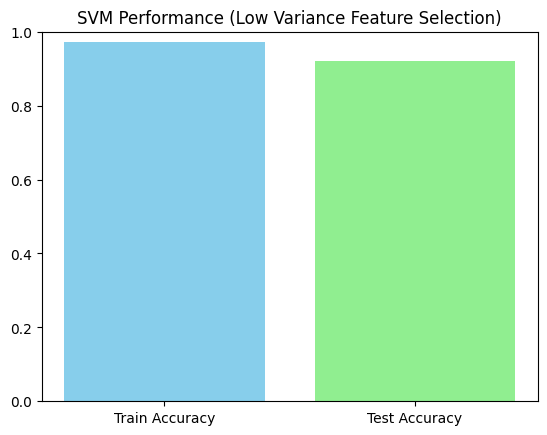

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Unnamed: 754_level_0_class"])
y = df["Unnamed: 754_level_0_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


selector = VarianceThreshold(threshold=0.01)
X_train_reduced = selector.fit_transform(X_train_scaled)
X_test_reduced = selector.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("Reduced features after variance threshold:", X_train_reduced.shape[1])


svm = SVC(kernel="poly", random_state=42)
svm.fit(X_train_reduced, y_train)

y_train_pred = svm.predict(X_train_reduced)
y_test_pred = svm.predict(X_test_reduced)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "lightgreen"])
plt.title("SVM Performance (Low Variance Feature Selection)")
plt.ylim(0, 1)
plt.show()


--- Data Subsetting for Speed ---
Original training set size: 567 samples
Original class distribution: Class 0: 144, Class 1: 423


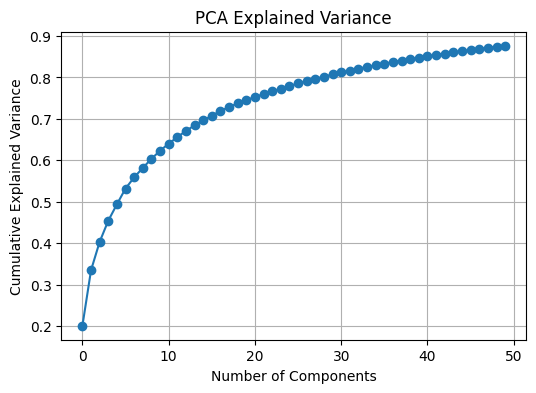


--- Classical SVM Performance ---
Train Accuracy: 0.9033333333333333
Test Accuracy: 0.8306878306878307
Precision: 0.8275841404675761
Recall: 0.8306878306878307
F1 Score: 0.8116462326988644


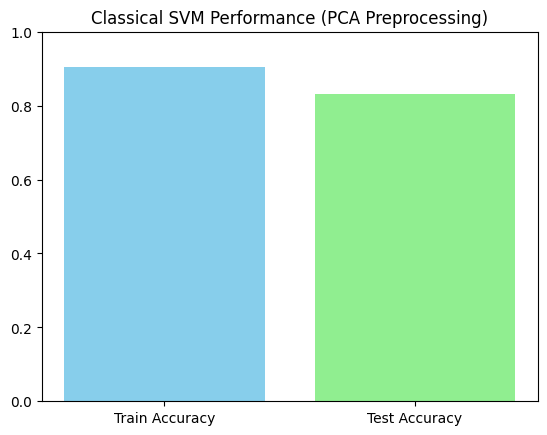

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

X = df.drop(columns=["Unnamed: 754_level_0_class"])
y = df["Unnamed: 754_level_0_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print("\n--- Data Subsetting for Speed ---")
print(f"Original training set size: {len(X_train)} samples")
print(f"Original class distribution: Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}")

subset_size = 300
if len(X_train) > subset_size:
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train, y_train,
        train_size=subset_size,
        random_state=42,
        stratify=y_train
    )
else:
    X_train_subset, y_train_subset = X_train.copy(), y_train.copy()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test)


pca_components = 50
pca = PCA(n_components=pca_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train_reduced, y_train_subset)

y_train_pred = svm.predict(X_train_reduced)
y_test_pred = svm.predict(X_test_reduced)

train_acc = accuracy_score(y_train_subset, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

print("\n--- Classical SVM Performance ---")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "lightgreen"])
plt.title("Classical SVM Performance (PCA Preprocessing)")
plt.ylim(0, 1)
plt.show()

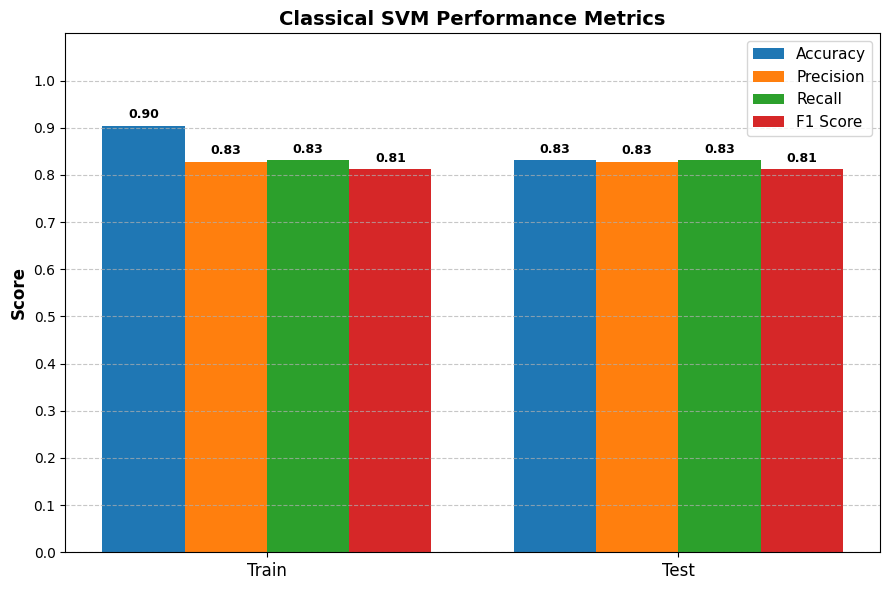

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics dictionary
metrics = {
    "Accuracy": [train_acc, test_acc],
    "Precision": [precision, precision],
    "Recall": [recall, recall],
    "F1 Score": [f1, f1]
}

labels = ["Train", "Test"]
x = np.arange(len(labels))
width = 0.2

# Define attractive colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.figure(figsize=(9,6))

# Plot each metric with offset
for i, (metric_name, values) in enumerate(metrics.items()):
    bars = plt.bar(x + i*width, values, width=width, color=colors[i], label=metric_name)
    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Style the plot
plt.xticks(x + 1.5*width, labels, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.ylim(0, 1.1)
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Classical SVM Performance Metrics", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

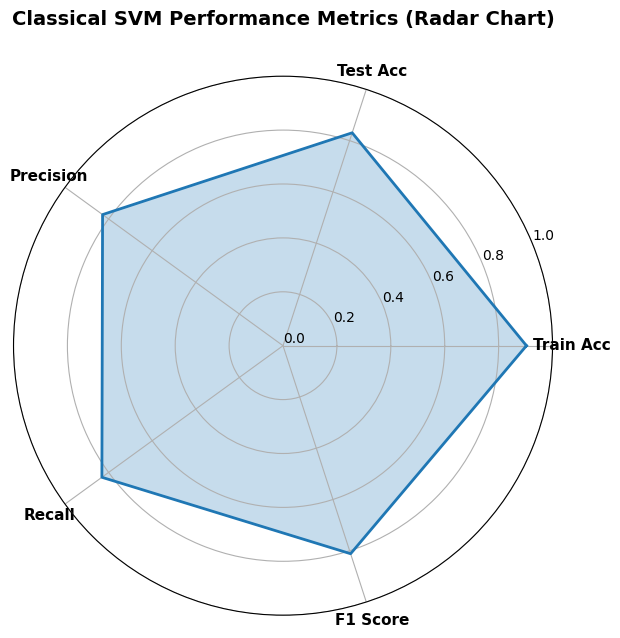

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for classical SVM
metrics_values = [train_acc, test_acc, precision, recall, f1]
metrics_names = ["Train Acc", "Test Acc", "Precision", "Recall", "F1 Score"]

# Number of metrics
N = len(metrics_values)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
metrics_values += metrics_values[:1]  # repeat first value to close the circle
angles += angles[:1]

# Plot
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.plot(angles, metrics_values, color="#1f77b4", linewidth=2, linestyle='solid')
ax.fill(angles, metrics_values, color="#1f77b4", alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_names, fontsize=11, fontweight='bold')
ax.set_yticks(np.linspace(0,1,6))
ax.set_yticklabels([f"{i:.1f}" for i in np.linspace(0,1,6)], fontsize=10)
ax.set_ylim(0,1)

plt.title("Classical SVM Performance Metrics (Radar Chart)", fontsize=14, fontweight='bold', y=1.08)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===========================
# Step 1: Train-Test Split
# ===========================
X = df.drop(columns=["Unnamed: 754_level_0_class"])   # features
y = df["Unnamed: 754_level_0_class"]                  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===========================
# Step 2: Preprocessing on training data
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # transform test with same scaler

# PCA
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Feature selection (RFE)
log_reg = LogisticRegression(max_iter=500, solver="liblinear")
rfe = RFE(log_reg, n_features_to_select=30)
X_train_selected = rfe.fit_transform(X_train_pca, y_train)
X_test_selected = rfe.transform(X_test_pca)

print("Train shape after RFE:", X_train_selected.shape)
print("Test shape after RFE:", X_test_selected.shape)

# Handle imbalance (SMOTE on train only)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_resampled))

# ===========================
# Step 3: Gradient Boosting + Hyperparameter Tuning
# ===========================
gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# ===========================
# Step 4: Evaluate on test set
# ===========================
best_gbc = grid.best_estimator_

y_pred = best_gbc.predict(X_test_selected)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train shape after RFE: (604, 30)
Test shape after RFE: (152, 30)
Before SMOTE: [153 451]
After SMOTE: [451 451]
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.9545426642111725

Test Accuracy: 0.8552631578947368

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       0.88      0.93      0.91       113

    accuracy                           0.86       152
   macro avg       0.82      0.79      0.80       152
weighted avg       0.85      0.86      0.85       152


Confusion Matrix:
 [[ 25  14]
 [  8 105]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ===========================
# Step 6: Random Forest + Hyperparameter Tuning
# ===========================
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_resampled, y_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

# ===========================
# Step 6: XGBoost + Hyperparameter Tuning
# ===========================
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_resampled, y_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:04:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation accuracy: 0.9397089478859388


In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ["linear", "rbf"]
}

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_resampled, y_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9485742379547689


In [ ]:
best_svm = grid.best_estimator_

y_pred = best_svm.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# trials

In [ ]:
X = df.drop(columns=["Unnamed: 754_level_0_class"])   # replace 'class' with correct label column name
y = df["Unnamed: 754_level_0_class"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print("original shape:", X.shape)
print("reduced shape:", X_pca.shape)



original shape: (756, 754)
reduced shape: (756, 50)


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# --- Function to remove low variance features ---
def remove_low_variance(df, threshold=0.01):
    print(f"\n--- Low Variance Feature Removal (threshold={threshold}) ---")
    print(f"Original shape: {df.shape}")

    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df)

    mask = selector.get_support()
    removed = df.columns[~mask].tolist()

    if removed:
        print(f"Removed {len(removed)} low-variance feature(s): {removed}")
    else:
        print("No low-variance features found.")

    return df.loc[:, mask], removed

# --- Apply Low Variance Removal ---
X_clean, low_var_removed = remove_low_variance(X, threshold=0.01)
print(f"Shape after low-variance removal: {X_clean.shape}")

# --- Standardize Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# --- PCA Dimensionality Reduction ---
pca = PCA(n_components=0.95, random_state=42)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"Shape after PCA: {X_pca.shape}")

# --- Train/Test Split (before SMOTE) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# --- Apply SMOTE only on training data ---
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

# --- Train Gradient Boosting ---
gb = GradientBoostingClassifier(
    n_estimators=200,   # number of boosting stages
    learning_rate=0.05, # lower lr + more estimators = better accuracy
    max_depth=3,        # tree depth
    random_state=42
)

gb.fit(X_train_res, y_train_res)

# --- Evaluate ---
y_pred = gb.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- Low Variance Feature Removal (threshold=0.01) ---
Original shape: (756, 754)
Removed 326 low-variance feature(s): ['Unnamed: 3_level_0_DFA', 'Unnamed: 7_level_0_meanPeriodPulses', 'Unnamed: 8_level_0_stdDevPeriodPulses', 'Unnamed: 9_level_0_locPctJitter', 'Unnamed: 10_level_0_locAbsJitter', 'Unnamed: 11_level_0_rapJitter', 'Unnamed: 12_level_0_ppq5Jitter', 'Unnamed: 13_level_0_ddpJitter', 'Unnamed: 14_level_0_locShimmer', 'Unnamed: 16_level_0_apq3Shimmer', 'Unnamed: 17_level_0_apq5Shimmer', 'Unnamed: 18_level_0_apq11Shimmer', 'Unnamed: 19_level_0_ddaShimmer', 'Unnamed: 20_level_0_meanAutoCorrHarmonicity', 'Unnamed: 39_level_0_GNE_SNR_TKEO', 'Unnamed: 41_level_0_GNE_NSR_TKEO', 'Unnamed: 42_level_0_GNE_NSR_SEO', 'Unnamed: 43_level_0_VFER_mean', 'Unnamed: 44_level_0_VFER_std', 'Unnamed: 48_level_0_VFER_NSR_TKEO', 'Unnamed: 49_level_0_VFER_NSR_SEO', 'Unnamed: 53_level_0_IMF_NSR_SEO', 'Unnamed: 55_level_0_IMF_NSR_entropy', 'Unnamed: 70_level_0_mean_delta_log_energy', 'Unnamed: 71_level

In [ ]:
#random forest
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.89      0.42      0.57        38
           1       0.84      0.98      0.90       114

    accuracy                           0.84       152
   macro avg       0.86      0.70      0.74       152
weighted avg       0.85      0.84      0.82       152



In [ ]:
#another classical model
 #(logistic regression)
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
log_reg.fit(X_train, y_train)
print("Logistic Regression:")

print(classification_report(y_test, log_reg.predict(X_test)))




Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        38
           1       0.87      0.95      0.91       114

    accuracy                           0.86       152
   macro avg       0.83      0.76      0.79       152
weighted avg       0.85      0.86      0.85       152



In [ ]:
#svm
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True))
])
svm.fit(X_train, y_train)
print("SVM")
print(classification_report(y_test, svm.predict(X_test)))

SVM
              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.83      0.99      0.90       114

    accuracy                           0.84       152
   macro avg       0.88      0.69      0.73       152
weighted avg       0.86      0.84      0.82       152



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
models = {
    "logistic regression": LogisticRegression(max_iter=1000),
    "SVM (with rbf kernel)": SVC(kernel='rbf', probability=True),
    "random forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "gradient boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

logistic regression: 0.8158
SVM (with rbf kernel): 0.8158
random forest: 0.8421
gradient boosting: 0.8553


In [ ]:
X = df.drop(columns=["Unnamed: 754_level_0_class"])   # features
y = df["Unnamed: 754_level_0_class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================
# Step 3: PCA (dimensionality reduction)
# ===========================
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape (PCA):", X_pca.shape)

# ===========================
# Step 4: Feature Selection with RFE
# (use Logistic Regression as estimator for RFE)
# ===========================
log_reg = LogisticRegression(max_iter=500, solver="liblinear")
rfe = RFE(log_reg, n_features_to_select=50)
X_selected = rfe.fit_transform(X_pca, y)

print("Shape after RFE:", X_selected.shape)

# ===========================
# Step 5: Handle imbalance with SMOTE
# ===========================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

print("Before SMOTE:", np.bincount(y))
print("After SMOTE:", np.bincount(y_resampled))

# ===========================
# Step 6: Gradient Boosting + Hyperparameter Tuning
# ===========================
gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_resampled, y_resampled)

# ===========================
# Step 7: Results
# ===========================
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)